### Run this script to plot with latex on a linux machine or Google Colab

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [ ]:
!pip install -r requirements.txt

# Main code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from collections import defaultdict

# from evaluation import eval, eval_multi, logger, MODE_ADVERSARY, MODE_ADVERSARY_RANDOMIZE, MODE_RANDOM, MODE_ADV_TASK_DIVERSITY
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
%load_ext autoreload
%autoreload 2

In [2]:
T = 2000 # Timesteps/horizon
n_task = 6000
alpha_set = [1.0] # Bonus for UCB
v_set = [1.0] # Bonus for TS
alpha_PHE_set = [1.0] # Bonus for PHE
tau_1_PEGE_set = [T//2] # EXR length for PEGE
is_multi = True
input_dict = {
    "d":10, # n_dims
    "unit_ball_action": True,
    # "n_gen_context":20, #if not unit ball action set, how many action sampled from the action set
    "T":T, # Timesteps/horizon
    "n_sim":1, # Number of Simulations
    "rho":0.5,
    "noise_std":1,
    "seed":None, #TODO: bug here, must set to None
    "output":True,
    "params_set":alpha_set,
    "m":3, # n_dims latent
    "n_task":n_task,
    # "mode":MODE_ADV_TASK_DIVERSITY,
    "adv_exr_const":0.1, # scaling factor for adversary task generation
    "adv_exr_task":None, # specific tasks to reveal a new dimension
    "PMA_exr_const":1.5, # scaling factor for exploration probability
    "PMA_lr_const":1, # scaling factor for the learning rate
    "PMA_n_expert":100000, # Expert set size for PMA
    "PMA_tau1_const":1, # scaling factor for PEGE's EXR length in the EXR phase
    "PMA_tau2_const":1, # scaling factor for PEGE's EXR length in the EXT phase
    "PMA_alpha_const":1, # scaling factor for PMA's alpha threshold
    "p_decay_rate":0, # decay rate for EXR prob. May be useful for Task Diversity setting
    "PMA_stop_exr":n_task, # Stop EXR after PMA_stop_exr step
    "PMA_no_oracle":False,
    "SeqRepL_exr_const":1.5,
    "SeqRepL_tau1_const":1,
    "SeqRepL_tau2_const":1,
    "SeqRepL_stop_exr":n_task, # Stop EXR after PMA_stop_exr step
    "fixed_params":[0.1, 400, 50], # fixed params for [p, tau1, tau2]
    "SeqRepL_exr_list": None
}
def load_dict(name):
    input_dict = np.load(name, allow_pickle='TRUE').item()
    input_dict = defaultdict(int,input_dict)
    mean_PEGE2 = input_dict['mean_PEGE2']
    std_PEGE2 = input_dict['std_PEGE2']
    mean_PEGE_oracle2 = input_dict['mean_PEGE_oracle2']
    std_PEGE_oracle2 = input_dict['std_PEGE_oracle2']
    mean_PMA2 = input_dict['mean_PMA2']
    std_PMA2 = input_dict['std_PMA2']
    mean_PMA_no_oracle2 = input_dict['mean_PMA_no_oracle2']
    std_PMA_no_oracle2 = input_dict['std_PMA_no_oracle2']
    mean_SeqRepL2 = input_dict['mean_SeqRepL2']
    std_SeqRepL2 = input_dict['std_SeqRepL2']
    return mean_PEGE2, std_PEGE2, mean_PEGE_oracle2, std_PEGE_oracle2, mean_PMA2, std_PMA2, mean_PMA_no_oracle2, std_PMA_no_oracle2, mean_SeqRepL2, std_SeqRepL2

## With Task Diversity

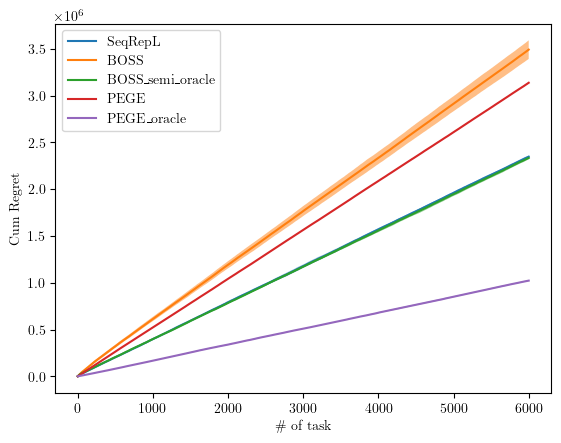

In [4]:
mean_PEGE, std_PEGE, mean_PEGE_oracle, std_PEGE_oracle, mean_PMA, std_PMA, mean_PMA_no_oracle, std_PMA_no_oracle, mean_SeqRepL, std_SeqRepL = load_dict('TaskDiv_RegExp.npy')

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL-std_SeqRepL, mean_SeqRepL+std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, '-', label='BOSS')
plt.fill_between(X, mean_PMA_no_oracle-std_PMA_no_oracle, mean_PMA_no_oracle+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, mean_PMA, '-', label='BOSS_semi_oracle')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.plot(X, mean_PEGE, '-', label='PEGE')
plt.fill_between(X, mean_PEGE-std_PEGE, mean_PEGE+std_PEGE, alpha=0.5)
plt.plot(X, mean_PEGE_oracle, '-', label='PEGE_oracle')
plt.fill_between(X, mean_PEGE_oracle-std_PEGE_oracle, mean_PEGE_oracle+std_PEGE_oracle, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel('Cum Regret')
plt.legend()
plt.show()
# plt.close()

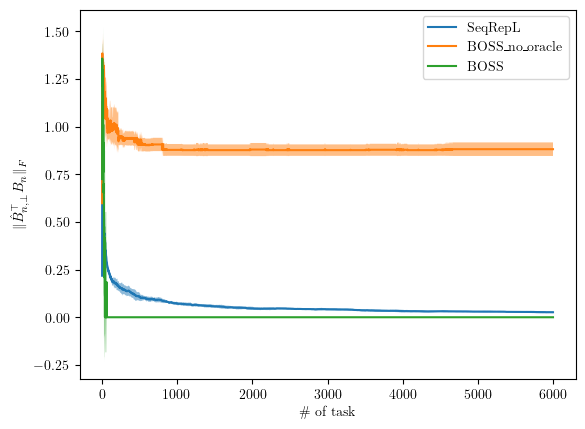

In [9]:
mean_PEGE, std_PEGE, mean_PEGE_oracle, std_PEGE_oracle, mean_PMA, std_PMA, mean_PMA_no_oracle, std_PMA_no_oracle, mean_SeqRepL, std_SeqRepL = load_dict('TaskDiv_B.npy')

plt.plot(X, mean_SeqRepL, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL-std_SeqRepL, mean_SeqRepL+std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, '-', label='BOSS_no_oracle')
plt.fill_between(X, mean_PMA_no_oracle-std_PMA_no_oracle, mean_PMA_no_oracle+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, mean_PMA, '-', label='BOSS')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel(r'$\|\hat{B}_{n, \perp}^{\top} B_n\|_F$')
plt.legend()
plt.show()
# plt.close()

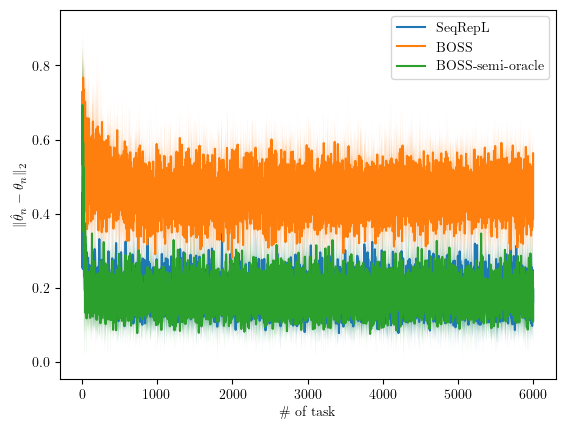

In [11]:
mean_PEGE, std_PEGE, mean_PEGE_oracle, std_PEGE_oracle, mean_PMA, std_PMA, mean_PMA_no_oracle, std_PMA_no_oracle, mean_SeqRepL, std_SeqRepL = load_dict('TaskDiv_theta.npy')

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL-std_SeqRepL, mean_SeqRepL+std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, '-', label='BOSS')
plt.fill_between(X, mean_PMA_no_oracle-std_PMA_no_oracle, mean_PMA_no_oracle+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, mean_PMA, '-', label='BOSS-semi-oracle')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel(r'$\|\hat{\theta}_n - \theta_n\|_2$')
plt.legend()
plt.show()
# plt.close()

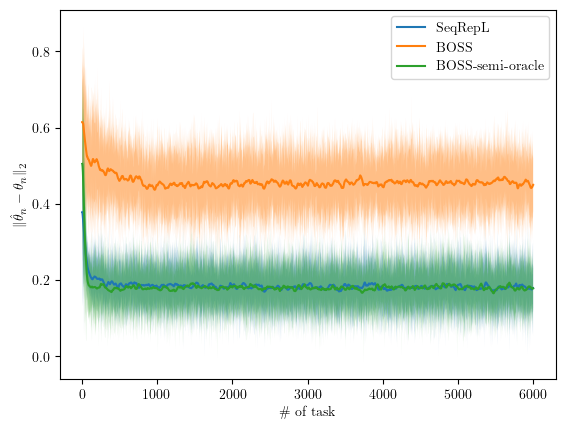

In [12]:
rbf = Rbf(X, mean_PMA_no_oracle, function = 'multiquadric', smooth = 500)
y_PMA_no_oracle_rbf = rbf(X)
rbf = Rbf(X, mean_PMA, function = 'multiquadric', smooth = 500)
y_PMA_rbf = rbf(X)
rbf = Rbf(X, mean_SeqRepL, function = 'multiquadric', smooth = 500)
y_SeqRepL_rbf = rbf(X)

plt.plot(X, y_SeqRepL_rbf, '-', label='SeqRepL')
plt.fill_between(X, y_SeqRepL_rbf-std_SeqRepL, y_SeqRepL_rbf+std_SeqRepL, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf, '-', label='BOSS')
plt.fill_between(X, y_PMA_no_oracle_rbf-std_PMA_no_oracle, y_PMA_no_oracle_rbf+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, y_PMA_rbf, '-', label='BOSS-semi-oracle')
plt.fill_between(X, y_PMA_rbf-std_PMA, y_PMA_rbf+std_PMA, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel(r'$\|\hat{\theta}_n - \theta_n\|_2$')

plt.legend()
plt.show()

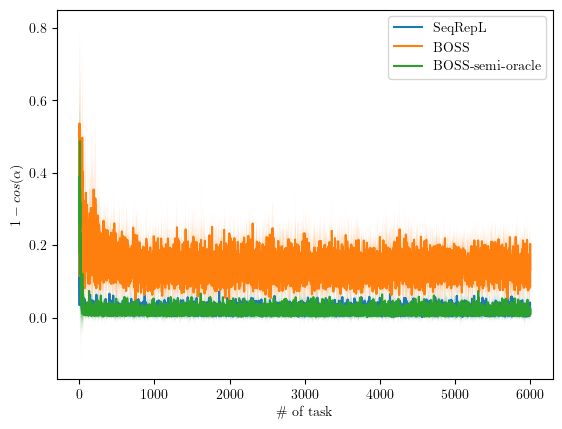

In [17]:
mean_PEGE, std_PEGE, mean_PEGE_oracle, std_PEGE_oracle, mean_PMA, std_PMA, mean_PMA_no_oracle, std_PMA_no_oracle, mean_SeqRepL, std_SeqRepL = load_dict('TaskDiv_angle.npy')

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL-std_SeqRepL, mean_SeqRepL+std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, '-', label='BOSS')
plt.fill_between(X, mean_PMA_no_oracle-std_PMA_no_oracle, mean_PMA_no_oracle+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, mean_PMA, '-', label='BOSS-semi-oracle')
plt.fill_between(X, mean_PMA-std_PMA, mean_PMA+std_PMA, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel('$1-cos(\\alpha)$')
plt.legend()
plt.show()
# plt.close()

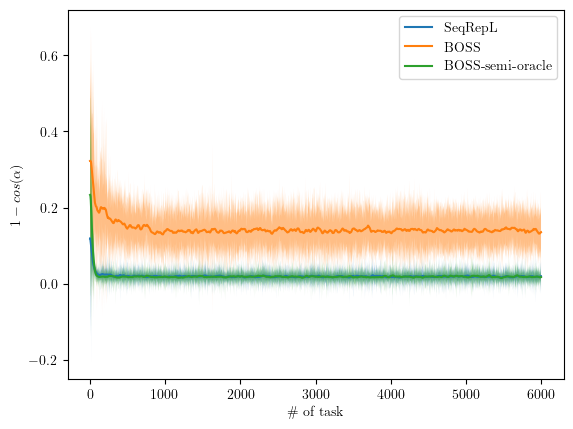

In [18]:
rbf = Rbf(X, mean_PMA_no_oracle, function = 'multiquadric', smooth = 500)
y_PMA_no_oracle_rbf = rbf(X)
rbf = Rbf(X, mean_PMA, function = 'multiquadric', smooth = 500)
y_PMA_rbf = rbf(X)
rbf = Rbf(X, mean_SeqRepL, function = 'multiquadric', smooth = 500)
y_SeqRepL_rbf = rbf(X)

plt.plot(X, y_SeqRepL_rbf, '-', label='SeqRepL')
plt.fill_between(X, y_SeqRepL_rbf-std_SeqRepL, y_SeqRepL_rbf+std_SeqRepL, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf, '-', label='BOSS')
plt.fill_between(X, y_PMA_no_oracle_rbf-std_PMA_no_oracle, y_PMA_no_oracle_rbf+std_PMA_no_oracle, alpha=0.5)
plt.plot(X, y_PMA_rbf, '-', label='BOSS-semi-oracle')
plt.fill_between(X, y_PMA_rbf-std_PMA, y_PMA_rbf+std_PMA, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel('$1-cos(\\alpha)$')

plt.legend()
plt.show()

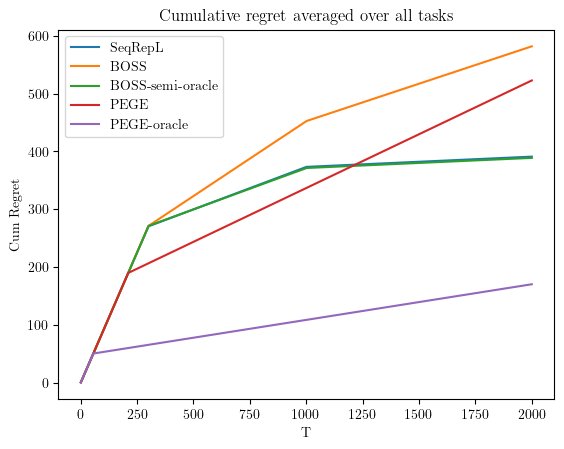

In [15]:
mean_PEGE_in_T, std_PEGE_in_T, mean_PEGE_oracle_in_T, std_PEGE_oracle_in_T, mean_PMA_in_T, std_PMA_in_T, mean_PMA_no_oracle_in_T, std_PMA_no_oracle_in_T, mean_SeqRepL_in_T, std_SeqRepL_in_T = load_dict('TaskDiv_T.npy')


X = np.arange(1,T+1)
plt.plot(X, mean_SeqRepL_in_T, '-', label='SeqRepL')
plt.plot(X, mean_PMA_no_oracle_in_T, '-', label='BOSS')
plt.plot(X, mean_PMA_in_T, '-', label='BOSS-semi-oracle')
plt.plot(X, mean_PEGE_in_T, '-', label='PEGE')
plt.plot(X, mean_PEGE_oracle_in_T, '-', label='PEGE-oracle')
# plt.fill_between(X, mean_SeqRepL_in_T-std_SeqRepL_in_T, mean_SeqRepL_in_T+std_SeqRepL_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA_no_oracle_in_T-std_PMA_no_oracle_in_T, mean_PMA_no_oracle_in_T+std_PMA_no_oracle_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA_in_T-std_PMA_in_T, mean_PMA_in_T+std_PMA_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE_in_T-std_PEGE_in_T, mean_PEGE_in_T+std_PEGE_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE_oracle_in_T-std_PEGE_oracle_in_T, mean_PEGE_oracle_in_T+std_PEGE_oracle_in_T, alpha=0.5)
plt.xlabel('T')
plt.ylabel('Cum Regret')
plt.legend()
plt.title(f'Cumulative regret averaged over all tasks')
plt.show()
# plt.close()

##Without Task Diversity

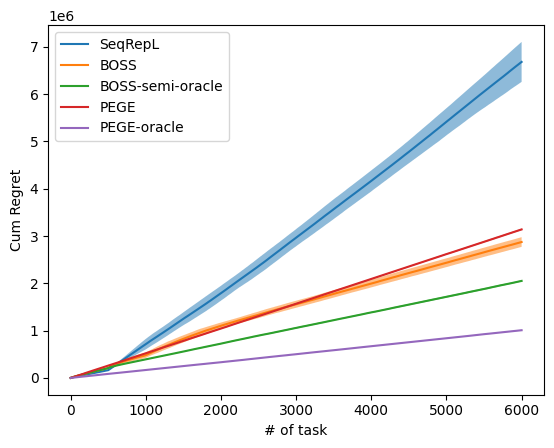

In [ ]:
mean_PEGE2, std_PEGE2, mean_PEGE_oracle2, std_PEGE_oracle2, mean_PMA2, std_PMA2, mean_PMA_no_oracle2, std_PMA_no_oracle2, mean_SeqRepL2, std_SeqRepL2 = load_dict('NoTaskDiv_RegExp.npy')

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL2, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL2-std_SeqRepL2, mean_SeqRepL2+std_SeqRepL2, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle2, '-', label='BOSS')
plt.fill_between(X, mean_PMA_no_oracle2-std_PMA_no_oracle2, mean_PMA_no_oracle2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, mean_PMA2, '-', label='BOSS-semi-oracle')
plt.fill_between(X, mean_PMA2-std_PMA2, mean_PMA2+std_PMA2, alpha=0.5)
plt.plot(X, mean_PEGE2, '-', label='PEGE')
plt.fill_between(X, mean_PEGE2-std_PEGE2, mean_PEGE2+std_PEGE2, alpha=0.5)
plt.plot(X, mean_PEGE_oracle2, '-', label='PEGE-oracle')
plt.fill_between(X, mean_PEGE_oracle2-std_PEGE_oracle2, mean_PEGE_oracle2+std_PEGE_oracle2, alpha=0.5)
plt.xlabel('# of task')
plt.ylabel('Cum Regret')
plt.legend()
plt.show()
plt.close()

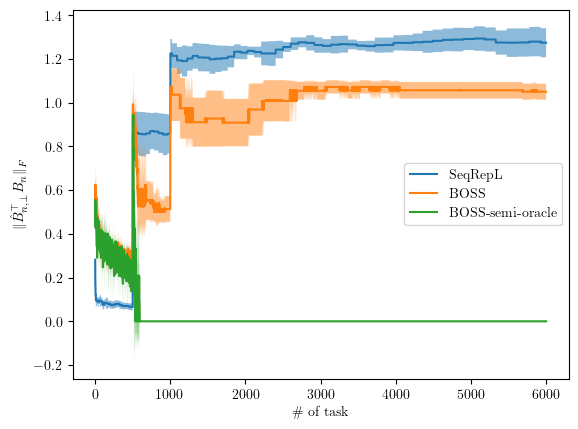

In [ ]:
mean_PEGE2, std_PEGE2, mean_PEGE_oracle2, std_PEGE_oracle2, mean_PMA2, std_PMA2, mean_PMA_no_oracle2, std_PMA_no_oracle2, mean_SeqRepL2, std_SeqRepL2 = load_dict('NoTaskDiv_B.npy')

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL2, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL2-std_SeqRepL2, mean_SeqRepL2+std_SeqRepL2, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle2, '-', label='BOSS')
plt.fill_between(X, mean_PMA_no_oracle2-std_PMA_no_oracle2, mean_PMA_no_oracle2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, mean_PMA2, '-', label='BOSS-semi-oracle')
plt.fill_between(X, mean_PMA2-std_PMA2, mean_PMA2+std_PMA2, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel(r'$\|\hat{B}_{n, \perp}^{\top} B_n\|_F$')
plt.legend()
plt.show()
plt.close()

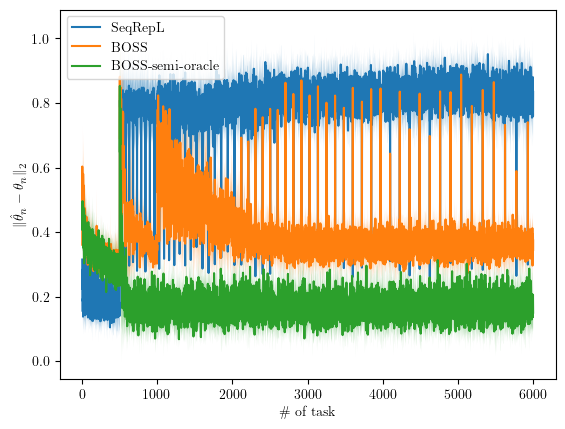

In [ ]:
mean_PEGE2, std_PEGE2, mean_PEGE_oracle2, std_PEGE_oracle2, mean_PMA2, std_PMA2, mean_PMA_no_oracle2, std_PMA_no_oracle2, mean_SeqRepL2, std_SeqRepL2 = load_dict('NoTaskDiv_theta.npy')

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL2, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL2-std_SeqRepL2, mean_SeqRepL2+std_SeqRepL2, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle2, '-', label='BOSS')
plt.fill_between(X, mean_PMA_no_oracle2-std_PMA_no_oracle2, mean_PMA_no_oracle2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, mean_PMA2, '-', label='BOSS-semi-oracle')
plt.fill_between(X, mean_PMA2-std_PMA2, mean_PMA2+std_PMA2, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel(r'$\|\hat{\theta}_n - \theta_n\|_2$')
plt.legend()
plt.show()

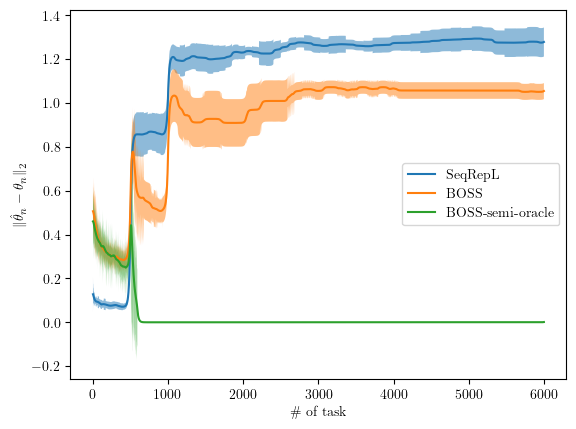

In [ ]:
rbf = Rbf(X, mean_PMA_no_oracle2, function = 'multiquadric', smooth = 500)
y_PMA_no_oracle_rbf2 = rbf(X)
rbf = Rbf(X, mean_PMA2, function = 'multiquadric', smooth = 500)
y_PMA_rbf2 = rbf(X)
rbf = Rbf(X, mean_SeqRepL2, function = 'multiquadric', smooth = 500)
y_SeqRepL_rbf2 = rbf(X)

plt.plot(X, y_SeqRepL_rbf2, '-', label='SeqRepL')
plt.fill_between(X, y_SeqRepL_rbf2-std_SeqRepL2, y_SeqRepL_rbf2+std_SeqRepL2, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf2, '-', label='BOSS')
plt.fill_between(X, y_PMA_no_oracle_rbf2-std_PMA_no_oracle2, y_PMA_no_oracle_rbf2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, y_PMA_rbf2, '-', label='BOSS-semi-oracle')
plt.fill_between(X, y_PMA_rbf2-std_PMA2, y_PMA_rbf2+std_PMA2, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel(r'$\|\hat{\theta}_n - \theta_n\|_2$')

plt.legend()
plt.show()

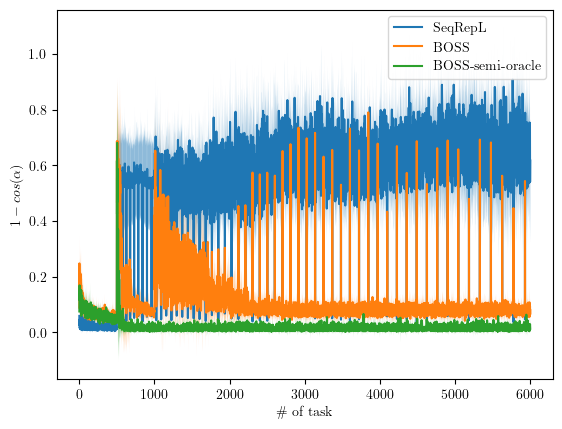

In [ ]:
mean_PEGE2, std_PEGE2, mean_PEGE_oracle2, std_PEGE_oracle2, mean_PMA2, std_PMA2, mean_PMA_no_oracle2, std_PMA_no_oracle2, mean_SeqRepL2, std_SeqRepL2 = load_dict('NoTaskDiv_angle.npy')

X = np.arange(1,n_task+1)
plt.plot(X, mean_SeqRepL2, '-', label='SeqRepL')
plt.fill_between(X, mean_SeqRepL2-std_SeqRepL2, mean_SeqRepL2+std_SeqRepL2, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle2, '-', label='BOSS')
plt.fill_between(X, mean_PMA_no_oracle2-std_PMA_no_oracle2, mean_PMA_no_oracle2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, mean_PMA2, '-', label='BOSS-semi-oracle')
plt.fill_between(X, mean_PMA2-std_PMA2, mean_PMA2+std_PMA2, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel('$1-cos(\\alpha)$')
plt.legend()
plt.show()

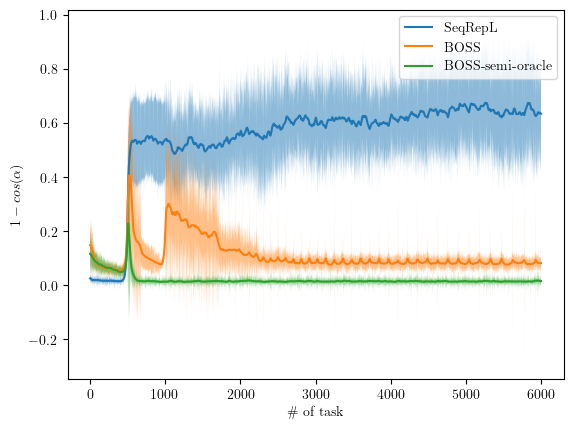

In [ ]:
rbf = Rbf(X, mean_PMA_no_oracle2, function = 'multiquadric', smooth = 500)
y_PMA_no_oracle_rbf2 = rbf(X)
rbf = Rbf(X, mean_PMA2, function = 'multiquadric', smooth = 500)
y_PMA_rbf2 = rbf(X)
rbf = Rbf(X, mean_SeqRepL2, function = 'multiquadric', smooth = 500)
y_SeqRepL_rbf2 = rbf(X)

plt.plot(X, y_SeqRepL_rbf2, '-', label='SeqRepL')
plt.fill_between(X, y_SeqRepL_rbf2-std_SeqRepL2, y_SeqRepL_rbf2+std_SeqRepL2, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf2, '-', label='BOSS')
plt.fill_between(X, y_PMA_no_oracle_rbf2-std_PMA_no_oracle2, y_PMA_no_oracle_rbf2+std_PMA_no_oracle2, alpha=0.5)
plt.plot(X, y_PMA_rbf2, '-', label='BOSS-semi-oracle')
plt.fill_between(X, y_PMA_rbf2-std_PMA2, y_PMA_rbf2+std_PMA2, alpha=0.5)
plt.xlabel(r'$\#$ of task')
plt.ylabel('$1-cos(\\alpha)$')

plt.legend()
plt.show()

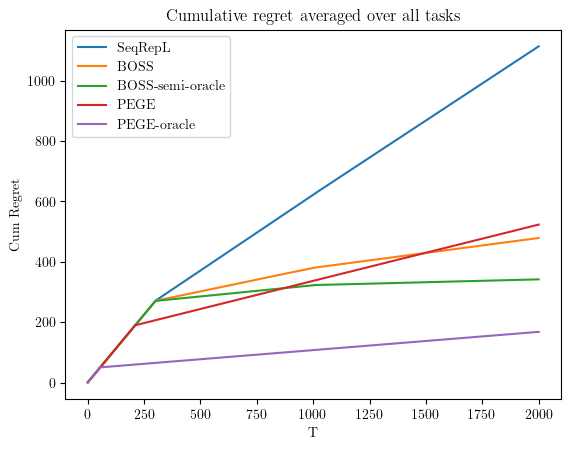

In [ ]:
mean_PEGE2_in_T, std_PEGE2_in_T, mean_PEGE_oracle2_in_T, std_PEGE_oracle2_in_T, mean_PMA2_in_T, std_PMA2_in_T, mean_PMA_no_oracle2_in_T, std_PMA_no_oracle2_in_T, mean_SeqRepL2_in_T, std_SeqRepL2_in_T = load_dict('NoTaskDiv_T.npy')

X = np.arange(1,T+1)
plt.plot(X, mean_SeqRepL2_in_T, '-', label='SeqRepL')
plt.plot(X, mean_PMA_no_oracle2_in_T, '-', label='BOSS')
plt.plot(X, mean_PMA2_in_T, '-', label='BOSS-semi-oracle')
plt.plot(X, mean_PEGE2_in_T, '-', label='PEGE')
plt.plot(X, mean_PEGE_oracle2_in_T, '-', label='PEGE-oracle')
# plt.fill_between(X, mean_SeqRepL2_in_T-std_SeqRepL2_in_T, mean_SeqRepL2_in_T+std_SeqRepL2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA_no_oracle2_in_T-std_PMA_no_oracle2_in_T, mean_PMA_no_oracle2_in_T+std_PMA_no_oracle2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA2_in_T-std_PMA2_in_T, mean_PMA2_in_T+std_PMA2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE2_in_T-std_PEGE2_in_T, mean_PEGE2_in_T+std_PEGE2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE_oracle2_in_T-std_PEGE_oracle2_in_T, mean_PEGE_oracle2_in_T+std_PEGE_oracle2_in_T, alpha=0.5)
plt.xlabel('T')
plt.ylabel('Cum Regret')
plt.legend()
plt.title(f'Cumulative regret averaged over all tasks')
plt.show()